XGBoost has similar behaviour to a decision tree in that each tree is split based on certain range values in different columns but unlike decision trees, each each node is given a weight. On each iteration a new tree is created and new node weights are assigned. For each tree the training examples with the biggest error from the previous tree are given extra attention so that the next tree will optimise more for these training examples, this is the boosting part of the algorithm. Finally, the outputs of each tree get ensembled, usually through averaging the weights for each instance from each tree to derive predictions.

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import pandas as pd
data = pd.DataFrame(boston.data)

In [8]:
print(data)

          0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  

In [9]:
data.columns = boston.feature_names

In [10]:
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
data[ 'PRICE' ] = boston.target

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


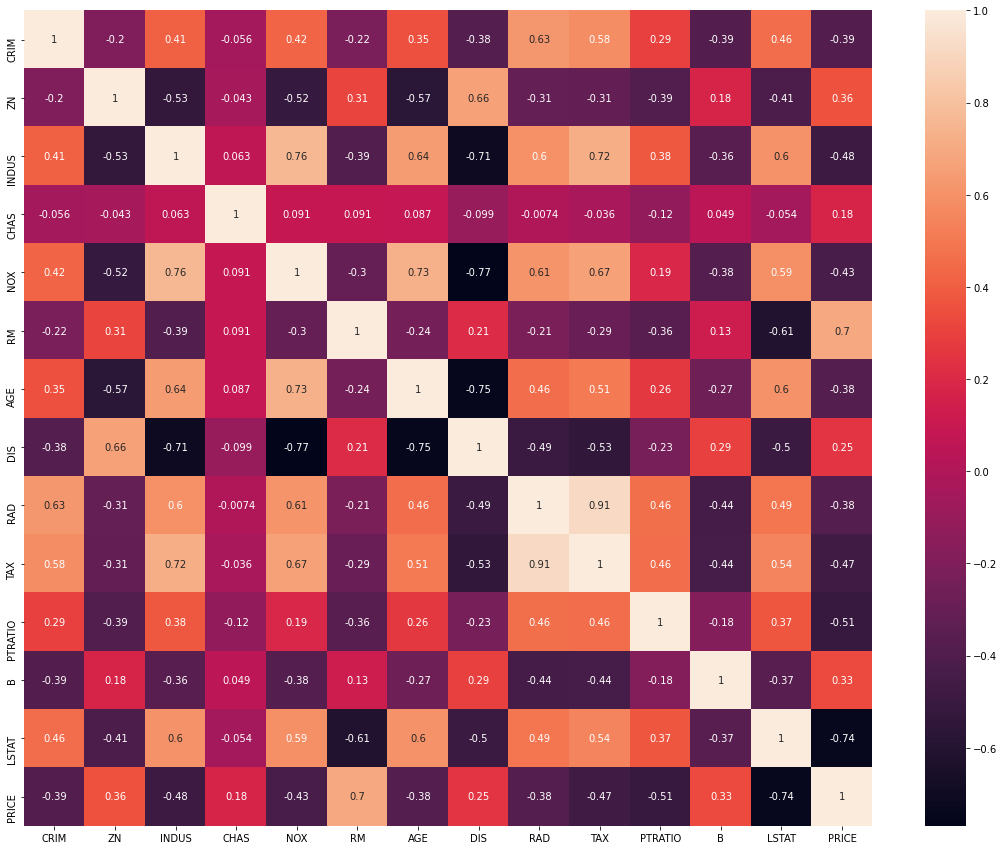

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

# taking all rows but only 6 columns
df_small = data.iloc[:,:]

correlation_mat = df_small.corr()
f = plt.figure(figsize=(19, 15))
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Separate the target variable and rest of the variables using .iloc to subset the data.


In [20]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [21]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [22]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

In [23]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

Now, you will create the train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the XGBClassifier() class.



In [25]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [26]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


In [28]:
#Make predictions using for the validation set and evaluate

from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test, preds))

MSE: 108.64399078990162


k-fold Cross Validation using XGBoost k=3


In [29]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [30]:
cv_results.mean()

train-rmse-mean    6.250620
train-rmse-std     0.157902
test-rmse-mean     7.280461
test-rmse-std      0.292517
dtype: float64

k-fold Cross Validation using XGBoost k=10

In [31]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [32]:
cv_results.mean()

train-rmse-mean    6.225567
train-rmse-std     0.113892
test-rmse-mean     6.950339
test-rmse-std      1.422083
dtype: float64

In [33]:
print((cv_results["test-rmse-mean"]).tail(10))

40    3.838933
41    3.805133
42    3.786832
43    3.766762
44    3.733196
45    3.710436
46    3.699066
47    3.681365
48    3.653122
49    3.640783
Name: test-rmse-mean, dtype: float64


In [34]:

print((cv_results["test-rmse-mean"]))

0     21.682404
1     19.757745
2     17.999079
3     16.454878
4     15.071905
5     13.850272
6     12.734998
7     11.746647
8     10.830948
9     10.036790
10     9.338878
11     8.713619
12     8.182603
13     7.682860
14     7.236247
15     6.831070
16     6.487247
17     6.184252
18     5.887088
19     5.629667
20     5.386202
21     5.192358
22     5.061023
23     4.893041
24     4.762840
25     4.647534
26     4.537182
27     4.432919
28     4.363821
29     4.311040
30     4.220032
31     4.157353
32     4.120211
33     4.074919
34     4.034988
35     3.994278
36     3.959868
37     3.928747
38     3.910142
39     3.873622
40     3.838933
41     3.805133
42     3.786832
43     3.766762
44     3.733196
45     3.710436
46     3.699066
47     3.681365
48     3.653122
49     3.640783
Name: test-rmse-mean, dtype: float64


In [35]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [37]:
import os
os.environ["PATH"] += os.pathsep + "D:/src/Graphviz/bin/"

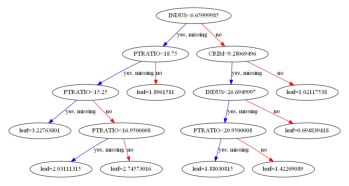

In [38]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [80, 10]
plt.show()

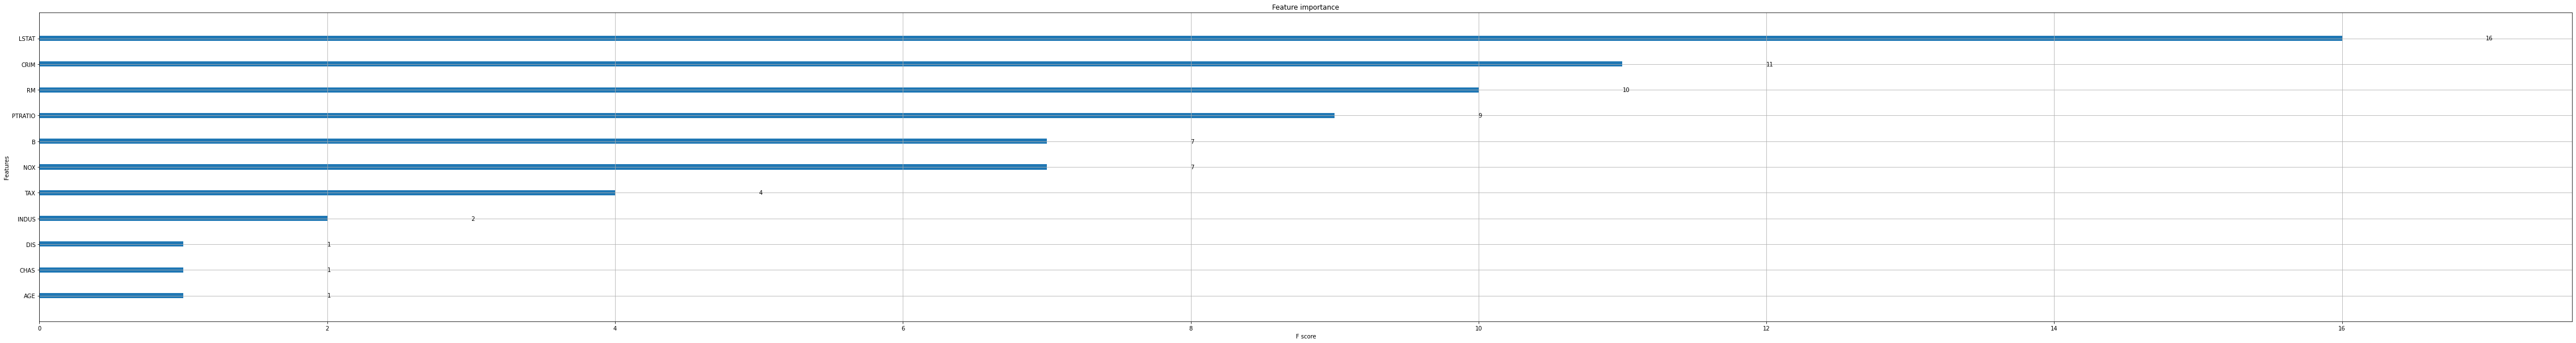

In [39]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

Let´s do some fine-tunning


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
data.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
# Remove the 'Name' and 'Ticket' columns from the dataframes 
data = data.drop(['CHAS', 'DIS',], axis=1)

In [43]:
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
#Declare the evaluation data set
eval_set = [(X_train, y_train),(X_test,y_test)]

In [45]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [46]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


In [48]:
#Make predictions using for the validation set and evaluate

from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test, preds))

MSE: 108.64399078990162


In [49]:
#Make predictions using for the validation set and evaluate

from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test, preds))

MSE: 108.64399078990162


**Subsample**

Value Range: 0 - 1

Decrease to reduce overfitting

Each tree will only get a % of the rows training examples and can be values between 0 and 1. Lowering this value stops subsets of training examples dominating the model and allows greater generalisation.



**Colsample_bytree**

Value Range: 0 - 1

Decrease to reduce overfitting

Similar to subsample but for columns rather than rows. Again you can set values between 0 and 1 where lower values can make the model generalise better by stopping any one field having too much prominence, a prominence that might not exist in the test data.



**Max_Depth**

Value Range: 0 - infinity

Decrease to reduce overfitting

This limits the maximum number of child nodes each branch of the tree can have. Keeping this low stops the model becoming too complex and creating splits that might only be relevant to the training data. However if this is too low, then the model might not be able to make use of all the information in your data.

Good values to use here will vary largely on the complexity of the problem you are trying to predict and the richness of your data. The default is 6 and generally is a good place to start and work up from however for simple problems or when dealing with small datasets then the optimum value can be lower.

*texto en cursiva*

**Min_Child_weight**

Value Range: 0 - infinity

Increase to reduce overfitting

Means that the sum of the weights in the child needs to be equal to or above the threshold set by this parameter. Good values to try are 1, 5, 15, 200 but this often depends on the amount of data in your training set as fewer examples will likely result in lower child weights.



**Learning_Rate**

Learning rate or ETA is similar to the learning rate you have may come across for things like gradient descent. In layman’s terms it is how much the weights are adjusted each time a tree is built. Set the learning rate too high and the algorithm might miss the optimum weights but set it too low and it might converge to suboptimal values.

**N_estimators**

N_estimators is the number of iterations the model will perform or in other words the number of trees that will be created. Often we set this to a large value and use early stopping to roll back the model to the one with the best performance.

It is worth noting that there is interaction here between the parameters and so adjusting one will often effect what happens will happen when we adjust another. For example, increasing the min_child_weight will reduce the impact of increasing the max_depth as the first parameter will limit how how many splits can occur anyway.

In [50]:
from sklearn.model_selection import GridSearchCV
PARAMETERS = {"subsample":[0.5, 0.75, 1],
"colsample_bytree":[0.5, 0.75, 1],
"max_depth":[2, 6, 12],
"min_child_weight":[1,5,15],
"learning_rate":[0.3, 0.1, 0.03],
"n_estimators":[100]}

In [51]:
#Initialise XGBoost Model
model = xgb.XGBRegressor(n_estimators=100, n_jobs=-1)
"""Initialise Grid Search Model to inherit from the XGBoost Model,
set the of cross validations to 3 per combination and use accuracy
to score the models."""

'Initialise Grid Search Model to inherit from the XGBoost Model,\nset the of cross validations to 3 per combination and use accuracy\nto score the models.'

eval_metric [ default according to objective ]
The metric to be used for validation data.

---


The default values are **rmse for regression** and **error for classification.**
Typical values are:

---



rmse – root mean square error

---


mae – mean absolute error

---



logloss – negative log-likelihood

---


error – Binary classification error rate (0.5 threshold)

---


merror – Multiclass classification error rate

---


mlogloss – Multiclass logloss

---


auc: Area under the curve

check this out: https://scikit-learn.org/stable/modules/model_evaluation.html

**Early stopping**



Now let’s train and evaluate a baseline model using only standard parameter settings as a comparison for the tuned model that we will create later. The model will be set to train for 100 iterations but will stop early if there has been no improvement after 10 rounds.

**Verbose**

 It is the model definition. The values it can take are: 0 - "silent"
1 - "warning", 2 - "info", 3 - "debug"

In [52]:
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring='neg_mean_squared_error')
#Fit the model as done previously
model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric='rmse',eval_set=eval_set,verbose=0)
print(model_gs.best_params_)

{'colsample_bytree': 0.75, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1}


In [53]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.423243


In [54]:
predictions = model_gs.predict(X_test)
print('MSE:',mean_squared_error(y_test, predictions))

MSE: 16.205436700509768


In [55]:
predictions = model_gs.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))


In [56]:
print('RMSE:',rmse)

RMSE: 4.025597682395717


In [57]:
rmse.mean()

4.025597682395717

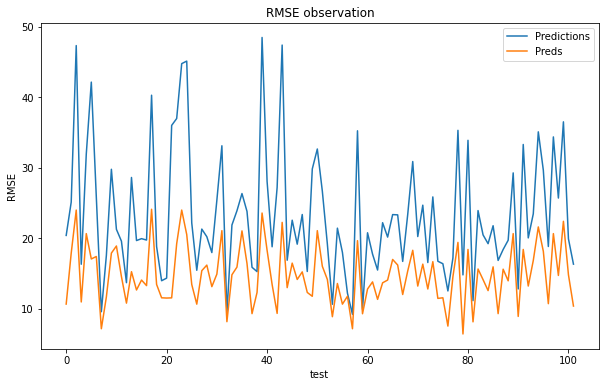

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions')
plt.plot(preds, label='Preds')
plt.title("RMSE observation")
plt.xlabel('test')
plt.ylabel('RMSE')
plt.legend()
plt.show();

In [59]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [60]:
mean_absolute_percentage_error(y_true=y_test,    
                    y_pred=predictions)


11.529687050067889